In [1]:
import numpy as np 
import pylab as plt 
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
import matplotlib.pyplot as plots

np.random.seed(140)

This expository assumes the reader has a basic understanding of probability theory at the undergraduate level. This section of the chapter is meant to establish that we will be working within probability spaces and establish some notation, especially with complex random variables that many readers may be unfamiliar with.

# Probability Space

## $\sigma$-algebras

Before defining a probability space, we must first understand the definition of a $\sigma$-algebra.

<hr>

**Definition:** A $\sigma$-algebra, $\Sigma$ on a set $S$ is a set of subsets of $S$ such that 

1. $S \in \Sigma$
2. $S_1, S_2, ... \in \Sigma \Rightarrow \bigcup_{i=1}^\infty S_i \in \Sigma$ 
3. $S_1 \in \Sigma \Rightarrow S_1^c \in \Sigma$

<hr>

Note that because elements of $\sigma$-algebras are closed under unions and complements, they are also closed under intersections since $A \cap B = (A^c \cup B^c)^c$.

## Definition

In classical probability we work within the confines of a probabilty space.

<hr>

**Definition:** A probability space is a mathematical triplet $(\Omega, \mathcal{F}, P)$

$\Omega$ is the sample space, which consists of all possible outcomes. This set may be finite or infinite.

$\mathcal{F}$ is a $\sigma$-algebra of subsets of $\Omega$ .

$P$ is the probability measure, which outputs the probability of an event. $P: \mathcal{F} \rightarrow [0,1]$.

<hr>

There are three fundamental axioms that the probability measure must obey.

1. For any $A \in \mathcal{F}$, $P(A) \geq 0$
2. $P(\Omega)$ = 1
3. If $A_1, A_2, ... \in \mathcal{F}$ are mutually exclusive events, $P(\bigcup_{i=1}^\infty A_i)= \sum_{i=1}^{\infty} P(A_i)$

## Bertrand's Paradox

Bertrand's paradox demonstrates the need to work with probability spaces. This version of Bertrand's paradox was taken from Lawrence C. Evans' *An Introduction to Stochastic Differential Equations*.

**Take a circle of radius 2 inches in the plane and choose a chord of this circle at random. What is the probability this chord intersects the concentric circle of radius 1 inch?**

### Solution 1

Any such chord (provided it does not hit the center) is uniquely determined by the location of its midpoint.

P(chord passes through unit circle) $=\frac{\text{area of smaller circle}}{\text{area of bigger circle}} = \frac{1}{4}$

Let's see if we can demonstrate this solution with monte carlo methods.

In [2]:
def sample_random_point(num_samples):
    length = [2*(np.random.uniform(0, 1))**.5 for i in range(num_samples)]
    angle = [np.pi * np.random.uniform(0, 2) for i in range(num_samples)]
    x1 = length * np.cos(angle)
    y1 = length * np.sin(angle)
    return pd.DataFrame({"x": x1, "y":y1})

def solution_1_plot(points):
    theta = np.linspace(0, 2*np.pi, 1000)
    bigx, bigy = 2 * np.cos(theta), 2 * np.sin(theta)
    smallx, smally = np.cos(theta), np.sin(theta)
    plt.plot(bigx, bigy, linestyle='-', linewidth=2)
    plt.plot(smallx, smally, linestyle='-', linewidth=2)
    plt.plot(points["x"], points["y"], marker='o', linewidth=0)
    plt.ylim([-2.5,2.5])
    plt.xlim([-2.5,2.5])
    plt.grid()
    plt.show(block=True)
    
def inside_unit_circle(row):
    return (row[0]**2 + row[1]**2) <= 1

In [3]:
sol_1_sample_size = 1000
random_point_example = sample_random_point(sol_1_sample_size)
in_unit_array = random_point_example.apply(inside_unit_circle, axis=1)

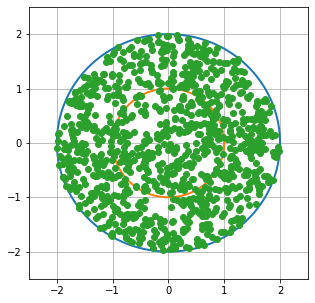

In [4]:
solution_1_plot(random_point_example)

In [5]:
number_of_points_inside_unit_circle = sum(in_unit_array)
number_of_points_inside_unit_circle / sol_1_sample_size

0.244

### Solution 2

By symmetry under rotation we may assume the chord is vertical. The diameter of the large circle is 4 inches and the chord will hit the small circle if it falls within its 2-inch diameter.

P(chord passes through unit circle) $= \frac{\text{diameter of smaller circle}}{\text{diameter of bigger circle}} = \frac{1}{2}$

In [6]:
def sample_random_vertical(num_samples):
    samples = np.array([])
    for i in range(num_samples):
        samples = np.append(samples, np.random.uniform(-2, 2))
    return samples

def vertical_plot(points):
    theta = np.linspace(0, 2*np.pi, 1000)
    bigx, bigy = 2 * np.cos(theta), 2 * np.sin(theta)
    smallx, smally = np.cos(theta), np.sin(theta)
    plt.plot(bigx, bigy, linestyle='-', linewidth=2)
    plt.plot(smallx, smally, linestyle='-', linewidth=2)
    [plt.axvline(x=point, c="black") for point in points]
    plt.ylim([-2.5,2.5])
    plt.xlim([-2.5,2.5])
    plt.grid()
    plt.show(block=True)

In [7]:
sol_2_sample_size = 100
vertical_cord_sample = sample_random_vertical(sol_2_sample_size)

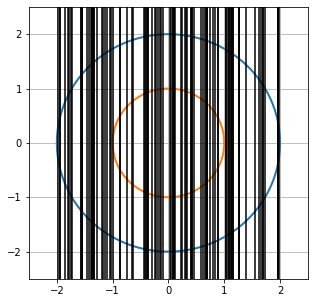

In [8]:
vertical_plot(vertical_cord_sample)

In [9]:
vertical_crossing_unit = sum(abs(vertical_cord_sample) <= 1)
vertical_crossing_prob = vertical_crossing_unit / sol_2_sample_size
vertical_crossing_prob

0.47

### Solution 3

By symmetry we may assume one end of the chord is at the far left point of the larger circle. The angle θ the chord makes with the horizontal lies between $\pm \frac{\pi}{2}$ and the chord hits the inner circle if $\theta$ lies between $\pm \frac{\pi}{3}$. 

P(chord passes through unit circle) = $\frac{\frac{2\pi}{6}}{\frac{2\pi}{2}} = \frac{1}{3}$

In [10]:
def sample_random_thetas(num_samples):
    samples = np.array([])
    for i in range(num_samples):
        samples = np.append(samples, np.random.uniform(-np.pi/2, np.pi/2))
    return samples

def angle_plot(thetas):
    theta = np.linspace(0, 2*np.pi, 1000)
    bigx, bigy = 2 * np.cos(theta), 2 * np.sin(theta)
    smallx, smally = np.cos(theta), np.sin(theta)
    plt.plot(bigx, bigy, linestyle='-', linewidth=2)
    plt.plot(smallx, smally, linestyle='-', linewidth=2)
    [plt.plot([-2, 2.5], [0, np.sqrt(2)*np.tan(theta) * 2.5 + 2*np.sqrt(2)*np.tan(theta)], 'k-') for theta in thetas]
    plt.ylim([-2.5,2.5])
    plt.xlim([-2.5,2.5])
    plt.grid()
    plt.show(block=True)

In [11]:
sol_3_sample_size = 100
sample_thetas = sample_random_thetas(sol_3_sample_size)

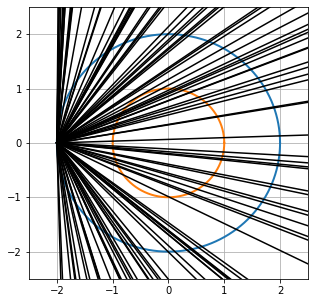

In [12]:
angle_plot(sample_thetas)

In [13]:
angle_crossing_unit = sum(abs(sample_thetas) <= np.pi/6)
angle_crossing_unit/sol_3_sample_size

0.34

This paradox is meant to point out that "randomness" is not necessarily well defined. To understand and measure random events, one needs to contextualize it within a probability space. Each of the methods for computing the probabilities above were correct, but they each had different probability spaces which is why they had different answers.

# Real Random Variables

## Computing Probabilities

A real valued random variable is a measurable function from the sample space to the real numbers. Random variables are used to express events, for instance if $X$ is a random variable and $S \subseteq \mathbb{R}$ is measurable then

$$P(X \in S) = P(\{\omega \in \Omega : X(\omega) \in S\}) $$

The distribution of a random variable identifies the possible values and the probabilty of those values. Random variables can map to both discrete and continuous ranges of $\mathbb{R}$. If $X$ is discrete, then 

$$P(X \in S) = \sum_{s \in S} P(X=s)$$

If $X$ has an absolutely continuous distribution with respect to the lebesgue measure with density $f$, then 

$$P(X \in S) = \int_{S} f_X(x) dx$$

The cumulative distribution function (CDF) for a random variable is a function of a real valued variable and returns the probability the random variable will be less than or equal to the input.

$$F_X(x) = P(X \leq x) $$

Note that for a random variable with an absolutely continuous distribution, the derivative of the CDF is equal to it's density by the Fundamental Theorem of Calculus

$$\frac{d}{dx}[F_X(x)] = \frac{d}{dx} \left[ \int_{-\infty}^{x} f_X(t) \ dt \right] = f_X(x)$$ 

## Center, Spread, and Correlation

The expectation and variance of a real valued random variable can be defined as follows for discrete and continuous random variables respectively.

$$\mathbb{E}[X] = \sum_x x P(X=x)$$

$$\mathbb{E}[X] = \int_x x f_X(x) dx$$

Here we are summing and integrating over the image of $X$ in $\mathbb{R}$. A nice fact about expectation is that it is linear over addition.

$$\mathbb{E}[\sum_i X_i] = \sum_i \mathbb{E}[X_i] $$

We can measure how spread out from the mean the distribution with the variance and standard deviation

$$Var(X) = \mathbb{E}[(X-\mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$$

$$SD(X) = \sqrt{Var(X)}$$

We will denote the variance and standard deviation of $X$ with $\sigma^2_X$ and $\sigma_X$ respectively. The covariance of $X$ and $Y$ is defined as 

$$Cov(X,Y) = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X] \mathbb{E}[Y] $$

Note that $Var(X) = Cov(X,X)$. 

# Complex Random Variables 

## Computing Probabilities for Complex Random Variables 

Random variables can also map outcomes to complex numbers. For a complex random variable $X$, the real ($\Re(X)$) and imaginary ($\Im(X)$) components are each real valued random variables. We can generalize the CDF to complex random variables to be a mapping from $\mathbb{C} \longrightarrow [0,1]$

$$ F_X(x) = P(\Re(X) \leq \Re(x), \Im(X) \leq \Im(x))$$

Just like real random variables when the distribution is absolutely continuous, we can find the density by differentiating 

$$f_X(x+iy) = \frac{\partial^2}{\partial x \partial y} P(\Re(X) \leq x, \Im(X) \leq y) $$

## Center, Spread, and Correlation of Complex Random Variables

The expectation of a complex random variable can be complex valued

$$\mathbb{E}[X] = \mathbb{E}[\Re(X)] + i \mathbb{E}[\Im(X)]$$

The variance of a complex random variable, however, is still a measure of spread and thus must be real valued. 

$$ Var(X) = \mathbb{E}[|X|^2] - |\mathbb{E}[X]|^2$$

$$SD(X) = \sqrt{Var(X)}$$

The covariance between two complex random variables is defined to be 

$$Cov(X,Y) = \mathbb{E}[X \overline{Y}] - E[X] \mathbb{E}[\overline{Y}]$$

Note that it is still true that $Var(X) = Cov(X,X)$

## Complex Normal

A random variable $X$ is normal if the joint distribution $(\Re(X), \Im(X))$ is multivariate normal. If $X$ is a complex normal random variable, we done its distribution as 

$$X \sim N_{\mathbb{C}}(\mu, \sigma^2) $$

where $\mu \in \mathbb{C}$ and $\sigma^2 \in \mathbb{R}$. A special case for this notation will be for the complex standard normal which will be denoted as $N(0, 1_{\mathbb{C}})$.